# Series RLC Circuit and Node Equations

This simulation will consider a simple RLC circuit.

- Input: Voltage source $u(t)$
- Element: Resistor $R$, inductor $L$, Capacitor $C$ in series
- Output: Capacitor voltage $v_c(t)$

We choose as state variables:

- Inductor current: $i_L(t)$
- Capacitor voltage: $v_C(t)$

Using KVL and the element relations:

- $v_R(t) = Ri_L(t)$
- $v_L(t) = L{di_L\over dt}$
- $i_C(t) = C{dv_c\over dt}$ and $i_C = i_L$ in series

We obtain the time-domain equations:

$$
L {di_L \over dt} = u(t) - R i_L(t) - v_C(t)
$$

$$
C {dv_C\over dt} = i_L(t)
$$

These two-order equations describe the dynamics of the series RLC circuit.

---

#Transfer Function $G(s) = {V_C(s) \over U(s)}$

In the Laplace domain, the impedances of the elements are

- $Z_R = R$
- $Z_L = sL$
- $Z_C = {1\over sC}$

Using voltage division for the series circuit, the transfer function from input $u(t)$ to capacitor voltage $v_C(t)$ is:

$$
G(s) = {V_C(t)\over U(s)} = {Z_C\over Z_R + Z_L + Z_C} = {{1\over sC}\over R+sL+{1\over sC}} = {1\over LCs^2+RCs+1}
$$

This is the frequency-domain description of the circuit.

---

# Differential Equation from the Transfer Function

Starting from

$$
{V_C(s)\over U(s)} = {1\over LCs^2 + RC s + 1'}
$$

we multiply both sides by $LCs^2 + RCs + 1$:

$$
(LCs^2 + RCs + 1)V_C(s) = U(s)
$$

Taking the inverse Laplace Transform gives the second-order differential equation:

$$
LC {d^2v_C\over dt^2} + RC {dv_C \over dt} + v_C(t) = u(t)
$$

This equation is equivalent to the first-order system written in the terms of $i_L(t)$ and $v_C(t)$.

---

# State-Space (Matrix) Form

We define the state vector:

$$
\mathbf{x}(t) =
\begin{bmatrix}
i_L(t) \\
v_C(t)
\end{bmatrix},
\qquad
\dot{\mathbf{x}}(t) =
\begin{bmatrix}
\dot{i}_L(t) \\
\dot{v}_C(t)
\end{bmatrix}.
$$

Using the first-order equations, we can write:

$$
\dot {\mathbf{x}}(t) = A\mathbf{x}(t) + Bu(t)
$$

with 

$$
A =
\begin{bmatrix}
-\dfrac{R}{L} & -\dfrac{1}{L} \\
\dfrac{1}{C}  & 0
\end{bmatrix},
\qquad
B =
\begin{bmatrix}
\dfrac{1}{L} \\
0
\end{bmatrix}.
$$

If we choose the output to be the capacitor voltage $y(t) = v_C(t)$, the output equation is 

$$
y(t) = C\mathbf{x}(t) + Du(t)
$$

with

$$
C = [\,0 \; 1\,], \qquad D = 0

\dot{\mathbf{x}} = A\mathbf{x} + B u, \qquad
y = C\mathbf{x} + D u
$$

This compact form

$$ 
\dot{\mathbf{x}}=A\mathbf{x} + Bu, \qquad
y = C\mathbf{x} + Du
$$

is the **matrix differential equation** (state-space model) used in simulation.

---

# Sine and Square Wave Inputs

We can excite the RLC circuit with different input waveforms:

## Single Sine Wave:

$$
u(t) = \hat{U} \sin(\omega t)
$$

which, in steady state, produces a sinusoidal output at the same frequency with gain and phase given by $G(j\omega)$

## Square Wave

$$
u(t) = \hat {U} \text{sgn} (\sin(\omega t))
$$

which can be seen as a sum of many sine waves (Fourier series). The state-space model handles this input naturally in the time domain by integrating the same differential equations.

In both cases, the underlying dynamics are governed by the same state-space system; only the input function $u(t)$ changes.

---

In [9]:
import numpy as np
import matplotlib.pyplot as plt

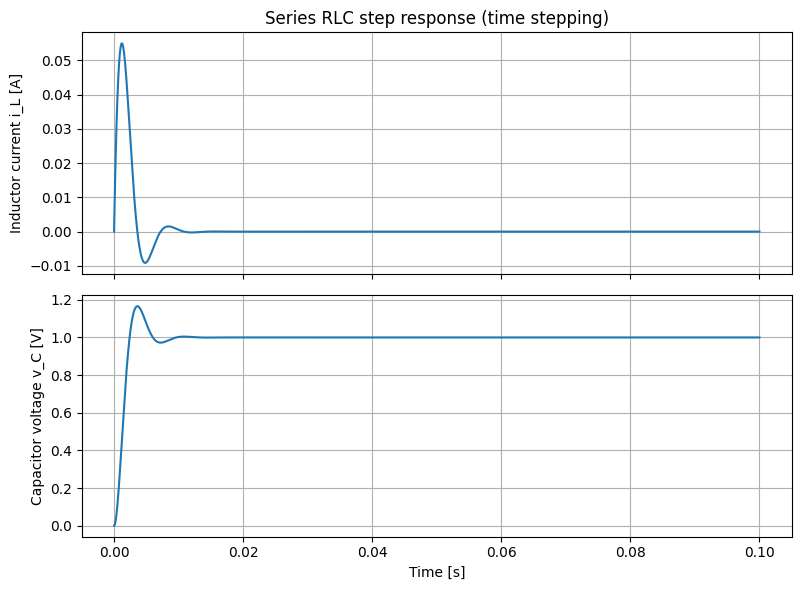

In [10]:
# ============================================
# Series RLC step response via time stepping
# x = [i_L, v_C]^T
# di_L/dt = (1/L) * (v_s - R*i_L - v_C)
# dv_C/dt = (1/C) * i_L
# ============================================

# Circuit parameters
R = 10.0        # [ohm]
L = 10e-3       # [H]
C = 100e-6      # [F]

# Simulation settings
t_end = 0.1     # [s] total simulation time
dt = 1e-5       # [s] time step
t = np.arange(0.0, t_end + dt, dt)
N = len(t)

# Input: 1 V step
Vs = np.ones(N)   # v_s(t) = 1 V for all t >= 0

# State-space matrices (real matrix differential equation)
# x_dot = A x + B u
A = np.array([
    [-R/L, -1.0/L],
    [ 1.0/C,    0.0]
])
B = np.array([
    [1.0/L],
    [0.0]
])

# Allocate state array: x = [i_L, v_C]^T
x = np.zeros((2, N))    # initial condition: i_L(0)=0, v_C(0)=0

# Time stepping (explicit Euler)
for k in range(N - 1):
    x_k = x[:, k]
    u_k = Vs[k]
    x_dot = A @ x_k + B.flatten() * u_k
    x[:, k + 1] = x_k + dt * x_dot

# Extract currents/voltages
i_L = x[0, :]
v_C = x[1, :]

# ============================================
# Plotting
# ============================================
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axes[0].plot(t, i_L)
axes[0].set_ylabel("Inductor current i_L [A]")
axes[0].set_title("Series RLC step response (time stepping)")
axes[0].grid(True)

axes[1].plot(t, v_C)
axes[1].set_ylabel("Capacitor voltage v_C [V]")
axes[1].set_xlabel("Time [s]")
axes[1].grid(True)

plt.tight_layout()
plt.show()

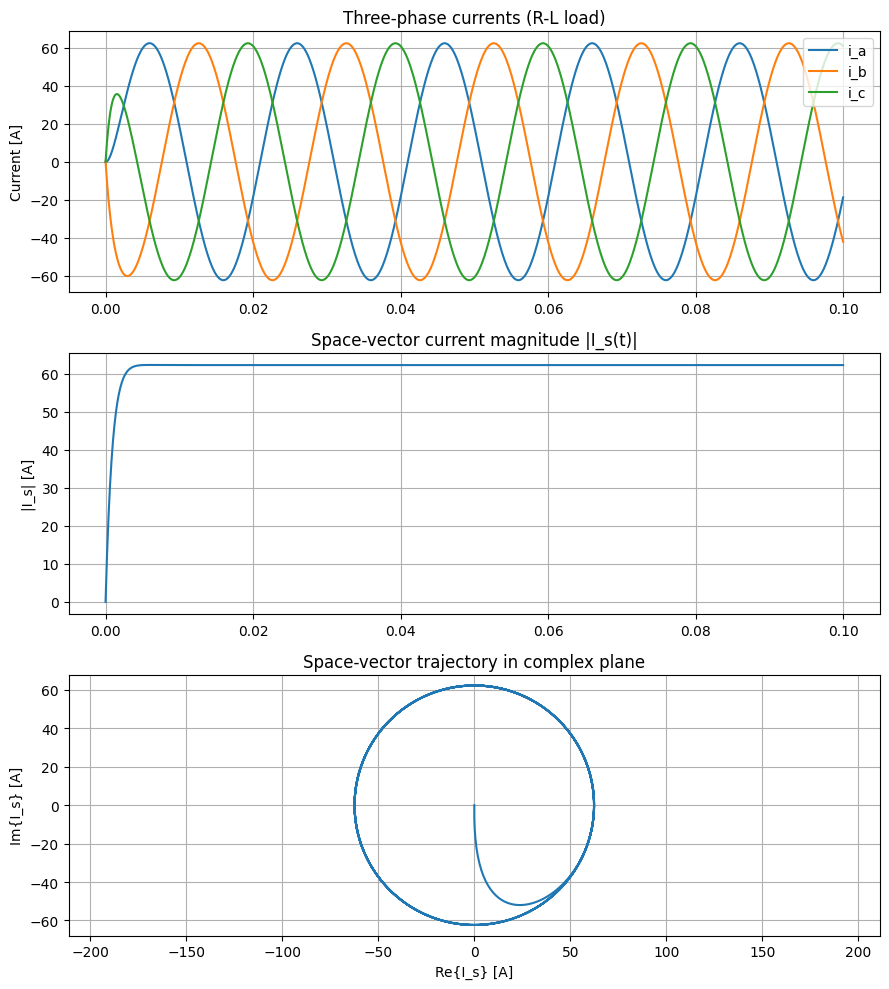

In [11]:
# ============================================
# 3-phase RL load driven by a balanced 3-phase source
# Time stepping (explicit Euler) + complex space-vector
# ============================================

# Circuit parameters
R = 5.0          # [ohm] phase resistance
L = 5e-3         # [H]   phase inductance

# Source parameters
f = 50.0                         # [Hz] fundamental frequency
omega = 2 * np.pi * f            # [rad/s]
V_phase_rms = 230.0              # [V] phase-to-neutral RMS
V_m = np.sqrt(2) * V_phase_rms   # [V] phase-to-neutral peak

# Simulation settings
t_end = 0.1          # [s] total simulation time
dt = 1e-4            # [s] time step
t = np.arange(0.0, t_end + dt, dt)
N = len(t)

# 3-phase source voltages (phase-to-neutral)
va = V_m * np.sin(omega * t)
vb = V_m * np.sin(omega * t - 2*np.pi/3)
vc = V_m * np.sin(omega * t - 4*np.pi/3)

# Stack into a 3xN array for convenience
vs = np.vstack((va, vb, vc))

# State: phase currents i_a, i_b, i_c
i = np.zeros((3, N))   # initial currents are zero

# State-space matrices (real 3x3 system):
# di/dt = A * i + B * v_s
A = -(R / L) * np.eye(3)
B = (1.0 / L) * np.eye(3)

# Time stepping (explicit Euler)
for k in range(N - 1):
    i_k = i[:, k]
    v_k = vs[:, k]
    di_dt = A @ i_k + B @ v_k
    i[:, k+1] = i_k + dt * di_dt

ia, ib, ic = i  # unpack rows

# ============================================
# Clarke transform (abc -> alpha-beta) and complex space vector
# ============================================

def abc_to_alpha_beta(ia, ib, ic):
    """
    Clarke transform for balanced 3-phase system.
    Returns i_alpha, i_beta.
    """
    # 2/3 scaling for power-invariant transform
    i_alpha = (2/3) * (ia - 0.5*ib - 0.5*ic)
    i_beta  = (2/3) * (np.sqrt(3)/2) * (ib - ic)
    return i_alpha, i_beta

i_alpha, i_beta = abc_to_alpha_beta(ia, ib, ic)
I_space = i_alpha + 1j * i_beta        # complex space vector
I_mag = np.abs(I_space)                # magnitude

# ============================================
# Plot results
# ============================================

fig, axes = plt.subplots(3, 1, figsize=(9, 10))

# 1) Phase currents
axes[0].plot(t, ia, label="i_a")
axes[0].plot(t, ib, label="i_b")
axes[0].plot(t, ic, label="i_c")
axes[0].set_title("Three-phase currents (R-L load)")
axes[0].set_ylabel("Current [A]")
axes[0].grid(True)
axes[0].legend(loc="upper right")

# 2) Space-vector magnitude
axes[1].plot(t, I_mag)
axes[1].set_title("Space-vector current magnitude |I_s(t)|")
axes[1].set_ylabel("|I_s| [A]")
axes[1].grid(True)

# 3) Space-vector trajectory in the complex plane
axes[2].plot(I_space.real, I_space.imag)
axes[2].set_title("Space-vector trajectory in complex plane")
axes[2].set_xlabel("Re{I_s} [A]")
axes[2].set_ylabel("Im{I_s} [A]")
axes[2].axis("equal")
axes[2].grid(True)

plt.tight_layout()
plt.show()

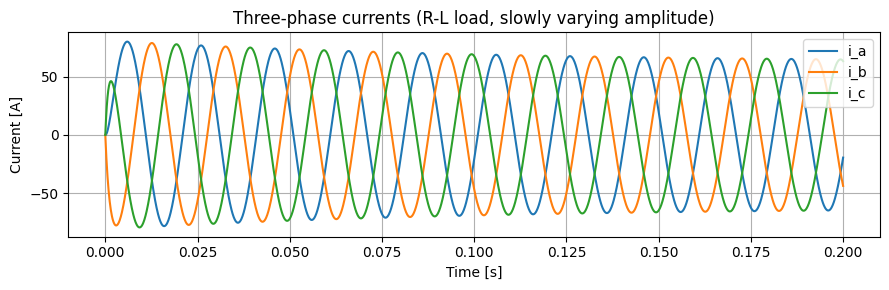

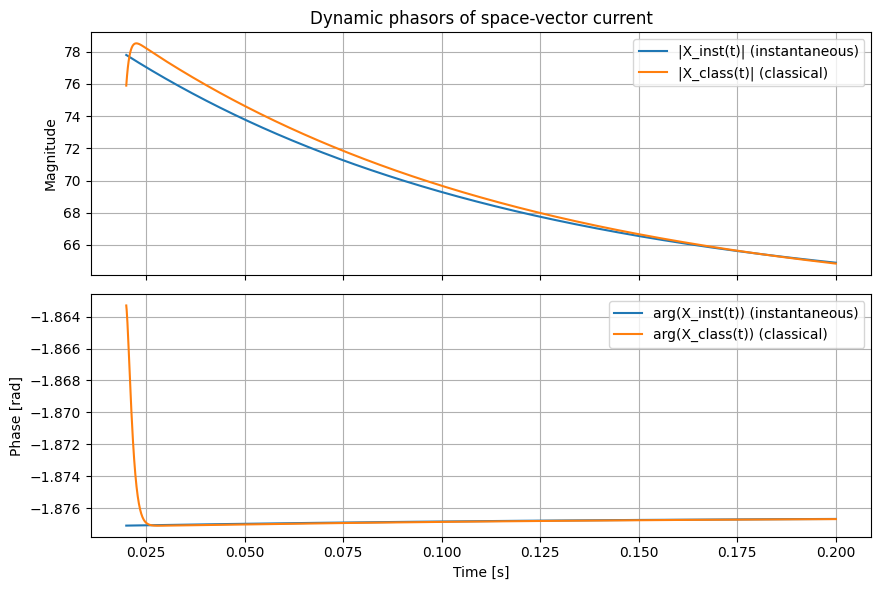

In [12]:
# ============================================
# 3-phase RL load + Dynamic Phasor demonstration
# ============================================

# -------- Circuit parameters --------
R = 5.0          # [ohm] phase resistance
L = 5e-3         # [H]   phase inductance

# -------- Source parameters --------
f0 = 50.0                      # [Hz] fundamental frequency
omega0 = 2 * np.pi * f0        # [rad/s]
T0 = 1.0 / f0                  # [s] fundamental period

V_phase_rms0 = 230.0           # [V] nominal phase-to-neutral RMS
V_m0 = np.sqrt(2) * V_phase_rms0  # peak voltage

# Slowly varying amplitude envelope for the source
t_end = 0.2        # [s] total simulation time
dt = 1e-4          # [s] time step
t = np.arange(0.0, t_end + dt, dt)
N = len(t)

tau_env = 0.1                     # [s] envelope time constant
A_env = 1.0 + 0.3 * np.exp(-t / tau_env)  # decays from 1.3 -> 1.0
V_m = V_m0 * A_env                # time-varying peak voltage

# -------- 3-phase source voltages (phase-to-neutral) --------
va = V_m * np.sin(omega0 * t)
vb = V_m * np.sin(omega0 * t - 2*np.pi/3)
vc = V_m * np.sin(omega0 * t - 4*np.pi/3)

vs = np.vstack((va, vb, vc))      # shape (3, N)

# -------- State-space model for 3-phase RL load --------
# di/dt = A * i + B * v_s
A_mat = -(R / L) * np.eye(3)
B_mat = (1.0 / L) * np.eye(3)

# State: phase currents [i_a, i_b, i_c]^T
i = np.zeros((3, N))              # initial currents = 0

# Time stepping (explicit Euler)
for k in range(N - 1):
    i_k = i[:, k]
    v_k = vs[:, k]
    di_dt = A_mat @ i_k + B_mat @ v_k
    i[:, k+1] = i_k + dt * di_dt

ia, ib, ic = i  # unpack

# ============================================
# Clarke transform and space-vector current
# ============================================

def abc_to_alpha_beta(ia, ib, ic):
    """
    Power-invariant Clarke transform (abc -> alpha-beta).
    Returns i_alpha, i_beta.
    """
    i_alpha = (2/3) * (ia - 0.5*ib - 0.5*ic)
    i_beta  = (2/3) * (np.sqrt(3)/2) * (ib - ic)
    return i_alpha, i_beta

i_alpha, i_beta = abc_to_alpha_beta(ia, ib, ic)
I_space = i_alpha + 1j * i_beta   # complex space-vector current

# ============================================
# Dynamic phasors of the space-vector current
# ============================================

def classical_dynamic_phasor(z, t, omega0, T0):
    """
    Classical (period-averaged) dynamic phasor for k = 1:

        X_class(t) = (1/T0) ∫_{t-T0}^{t} z(τ) e^{-jω0 τ} dτ

    The integral is evaluated numerically over a sliding window
    using the trapezoidal rule.
    """
    dt = t[1] - t[0]
    Nwin = int(round(T0 / dt))    # samples per period
    N = len(t)
    X = np.full(N, np.nan, dtype=complex)

    for n in range(Nwin - 1, N):
        tau = t[n - Nwin + 1 : n + 1]
        zw = z[n - Nwin + 1 : n + 1]
        integrand = zw * np.exp(-1j * omega0 * tau)
        X[n] = (1.0 / T0) * np.trapezoid(integrand, tau)

    return X

# Instantaneous dynamic phasor (no time averaging)
X_inst = I_space * np.exp(-1j * omega0 * t)

# Classical (period-averaged) dynamic phasor
X_class = classical_dynamic_phasor(I_space, t, omega0, T0)

# ============================================
# Plot results
# ============================================

fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3))
ax1.plot(t, ia, label="i_a")
ax1.plot(t, ib, label="i_b")
ax1.plot(t, ic, label="i_c")
ax1.set_title("Three-phase currents (R-L load, slowly varying amplitude)")
ax1.set_ylabel("Current [A]")
ax1.set_xlabel("Time [s]")
ax1.grid(True)
ax1.legend(loc="upper right")
fig1.tight_layout()

# ---- Dynamic phasor magnitudes and phases ----
fig2, (ax2a, ax2b) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# Ignore the first period where X_class is NaN
mask = t >= T0

ax2a.plot(t[mask], np.abs(X_inst[mask]), label="|X_inst(t)| (instantaneous)")
ax2a.plot(t[mask], np.abs(X_class[mask]), label="|X_class(t)| (classical)")
ax2a.set_ylabel("Magnitude")
ax2a.set_title("Dynamic phasors of space-vector current")
ax2a.grid(True)
ax2a.legend()

ax2b.plot(t[mask], np.unwrap(np.angle(X_inst[mask])),
          label="arg(X_inst(t)) (instantaneous)")
ax2b.plot(t[mask], np.unwrap(np.angle(X_class[mask])),
          label="arg(X_class(t)) (classical)")
ax2b.set_ylabel("Phase [rad]")
ax2b.set_xlabel("Time [s]")
ax2b.grid(True)
ax2b.legend()

fig2.tight_layout()

plt.show()


/var/folders/25/vg8ydb454_z3v37m53jqj5280000gn/T/ipykernel_48276/3880248800.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k] = Cmat @ x[:, k] + D * u_k
/var/folders/25/vg8ydb454_z3v37m53jqj5280000gn/T/ipykernel_48276/3880248800.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[-1] = Cmat @ x[:, -1]


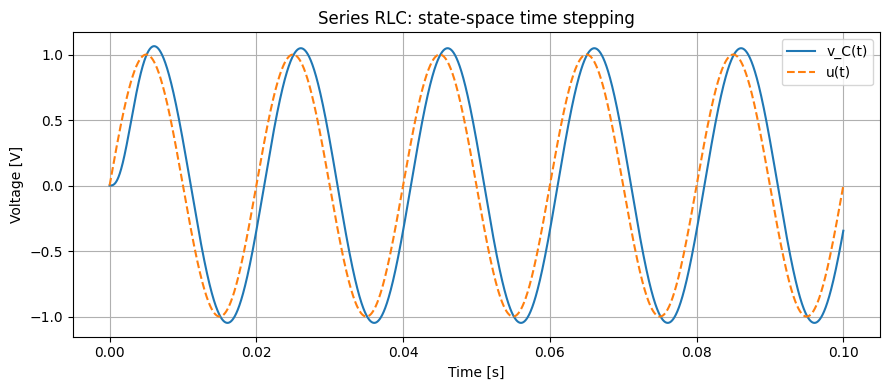

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Circuit parameters
R = 10.0        # ohm
L = 10e-3       # H
C = 100e-6      # F

# State-space matrices
A = np.array([
    [-R/L, -1.0/L],
    [ 1.0/C,  0.0 ]
])
B = np.array([
    [1.0/L],
    [0.0]
])
Cmat = np.array([[0.0, 1.0]])   # output = v_C
D = 0.0

# Time settings
t_end = 0.1
dt = 1e-5
t = np.arange(0.0, t_end + dt, dt)
N = len(t)

# Choose input: sine or square
f0 = 50.0
omega0 = 2 * np.pi * f0

def u_sine(t):
    U = 1.0       # peak
    return U * np.sin(omega0 * t)

def u_square(t):
    U = 1.0
    return U * np.sign(np.sin(omega0 * t))

# Pick input here
u_func = u_sine    # or u_square

# Allocate state & output
x = np.zeros((2, N))        # [i_L, v_C]^T
y = np.zeros(N)             # v_C

# Time stepping (explicit Euler for simplicity)
for k in range(N - 1):
    u_k = u_func(t[k])
    x_dot = A @ x[:, k] + B.flatten() * u_k
    x[:, k+1] = x[:, k] + dt * x_dot
    y[k] = Cmat @ x[:, k] + D * u_k

# last output
y[-1] = Cmat @ x[:, -1]

# Plot
plt.figure(figsize=(9, 4))
plt.plot(t, y, label="v_C(t)")
plt.plot(t, [u_func(tt) for tt in t], "--", label="u(t)")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Series RLC: state-space time stepping")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
